<a href="https://colab.research.google.com/github/ThatGuyDV/CNNapproches/blob/master/imagenette_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pathlib
import os 
import tensorflow as tf
import tarfile

In [9]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz

--2020-07-09 06:27:46--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.145.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.145.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98752094 (94M) [application/x-tar]
Saving to: ‘imagenette-160.tgz’

imagenette-160.tgz  100%[===================>]  94.18M  39.1MB/s    in 2.4s    

2020-07-09 06:27:49 (39.1 MB/s) - ‘imagenette-160.tgz’ saved [98752094/98752094]



In [10]:
with tarfile.open('/content/imagenette-160.tgz', 'r') as f:
  f.extractall()

In [13]:
path = pathlib.Path('/content/imagenette-160')

In [14]:
train_dir = path/'train'
val_dir = path/'val'

In [17]:
train_file_count = len(list(train_dir.glob('*/*.JPEG')))

In [18]:
train_file_count

12894

In [19]:
batch_size = 64
im_size = (128,128)

In [23]:
labels = ['tench', 'English springer', 'cassette player', 
          'chain saw', 'church', 'French horn', 'garbage truck',
          'gas pump', 'golf ball', 'parachute']

In [24]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,rescale = 1./255
)

In [26]:
train_generator = train_datagen.flow_from_directory(train_dir, shuffle=True, 
             target_size = im_size, 
             batch_size=batch_size, interpolation = 'bilinear')

Found 12894 images belonging to 10 classes.


In [27]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255)

In [30]:
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=batch_size,
                              target_size = im_size, interpolation="bilinear")

Found 500 images belonging to 10 classes.


In [34]:
import matplotlib.pyplot as plt

In [58]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(labels[int(np.where(label_batch[n]==1)[0])].title())
      plt.axis('off')

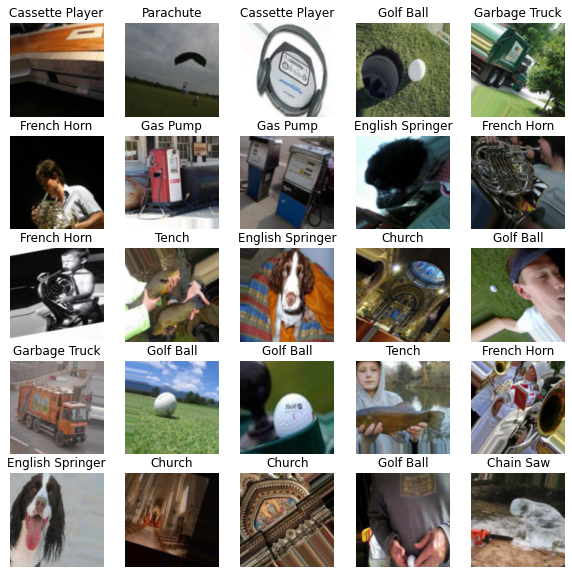

In [59]:
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)